<a href="https://colab.research.google.com/github/amit-420/legged_course/blob/main/Legged_Module_3_double_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pylab as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint,ode

In [3]:
t1, t2, l, c1, c2, I1, I2, w1, w2, m1, m2 = sp.symbols('theta1,theta2,l,c1,c2,I1,I2, omega1, omega2, m1, m2')

g = 9.81

q = sp.Matrix([t1,t2])
qdot = sp.Matrix([w1,w2])

def i_1Ti(t,x,y):
    return sp.Matrix([[sp.cos(t), -sp.sin(t), x],
                     [sp.sin(t), sp.cos(t),   y],
                     [0,        0,            1]])

T1 = i_1Ti((3*sp.pi/2)+t1,0,0)
T2 = i_1Ti(t2,l,0)

# Position of COM in base frame:

X1 = T1@sp.Matrix([c1,0,1])
X2 = T1@T2@sp.Matrix([c2,0,1])

X1 = sp.Matrix(X1[0:2])

X2 = sp.Matrix(X2[0:2])

X1

Matrix([
[ c1*sin(theta1)],
[-c1*cos(theta1)]])

In [4]:
X2

Matrix([
[c2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + l*sin(theta1)],
[c2*(sin(theta1)*sin(theta2) - cos(theta1)*cos(theta2)) - l*cos(theta1)]])

In [5]:
Vg1 = X1.jacobian(q)@sp.Matrix(qdot)
Vg2 = X2.jacobian(q)@sp.Matrix(qdot)
Vg1

Matrix([
[c1*omega1*cos(theta1)],
[c1*omega1*sin(theta1)]])

In [6]:
Vg2

Matrix([
[c2*omega2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + omega1*(c2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + l*cos(theta1))],
[  c2*omega2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + omega1*(c2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + l*sin(theta1))]])

In [7]:
T = (0.5 *m1 * ( Vg1.T @ Vg1))[0] + (0.5 *m2 * ( Vg2.T @ Vg2) )[0] + 0.5*I1*w1**2 + 0.5*I2*(w1+w2)**2
T

0.5*I1*omega1**2 + 0.5*I2*(omega1 + omega2)**2 + 0.5*m1*(c1**2*omega1**2*sin(theta1)**2 + c1**2*omega1**2*cos(theta1)**2) + 0.5*m2*((c2*omega2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + omega1*(c2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + l*cos(theta1)))**2 + (c2*omega2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + omega1*(c2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + l*sin(theta1)))**2)

In [8]:
V = m1*g*X1[1] + m2*g*X2[1]
V

-9.81*c1*m1*cos(theta1) + 9.81*m2*(c2*(sin(theta1)*sin(theta2) - cos(theta1)*cos(theta2)) - l*cos(theta1))

In [9]:
L = T - V
L

0.5*I1*omega1**2 + 0.5*I2*(omega1 + omega2)**2 + 9.81*c1*m1*cos(theta1) + 0.5*m1*(c1**2*omega1**2*sin(theta1)**2 + c1**2*omega1**2*cos(theta1)**2) - 9.81*m2*(c2*(sin(theta1)*sin(theta2) - cos(theta1)*cos(theta2)) - l*cos(theta1)) + 0.5*m2*((c2*omega2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + omega1*(c2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + l*cos(theta1)))**2 + (c2*omega2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + omega1*(c2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + l*sin(theta1)))**2)

In [10]:
dLdq = sp.diff(L,q)
dLdq

Matrix([
[-9.81*c1*m1*sin(theta1) - 9.81*m2*(c2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + l*sin(theta1)) + 0.5*m2*((c2*omega2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + omega1*(c2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + l*cos(theta1)))*(2*c2*omega2*(-sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1)) + 2*omega1*(c2*(-sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1)) - l*sin(theta1))) + (2*c2*omega2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + 2*omega1*(c2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + l*cos(theta1)))*(c2*omega2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + omega1*(c2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + l*sin(theta1))))],
[                                                                               -9.81*c2*m2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + 0.5*m2*((2*c2*omega1*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + 2*c2*omega2*(-sin(theta1)*sin(theta2) + cos(thet

In [11]:
dLdqdot = sp.diff(L,qdot)
dLdqdot

Matrix([
[1.0*I1*omega1 + 0.5*I2*(2*omega1 + 2*omega2) + 0.5*m1*(2*c1**2*omega1*sin(theta1)**2 + 2*c1**2*omega1*cos(theta1)**2) + 0.5*m2*((2*c2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + 2*l*cos(theta1))*(c2*omega2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + omega1*(c2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + l*cos(theta1))) + (2*c2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + 2*l*sin(theta1))*(c2*omega2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + omega1*(c2*(sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1)) + l*sin(theta1))))],
[                                                                                                                                 0.5*I2*(2*omega1 + 2*omega2) + 0.5*m2*(2*c2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2))*(c2*omega2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + omega1*(c2*(-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2)) + l*cos(theta1))) + 2*c2*(sin(theta1)*cos(theta2) +

In [12]:
w1dot, w2dot = sp.symbols('omegadot1, omegadot2')
qddot = sp.Matrix([w1dot,w2dot])
qddot

Matrix([
[omegadot1],
[omegadot2]])

In [13]:
ddt_dLdqdot = sp.Matrix([sp.diff(dLdqdot[0],qdot).T,
                 sp.diff(dLdqdot[1],qdot).T])@qddot + sp.Matrix([sp.diff(dLdqdot[0],q).T,
                 sp.diff(dLdqdot[1],q).T])@qdot
ddt_dLdqdot.shape

(2, 1)

In [27]:
eom = ddt_dLdqdot - dLdq
eom.shape

(2, 1)

In [26]:
B = eom.subs({w1dot:0,w2dot:0})
B.shape

(2, 1)

In [24]:
M = eom.jacobian(qddot)
M.shape

(2, 2)

In [25]:
G = B.subs({w1:0,w2:0})
G.shape

(2, 1)

In [23]:
C = B - G
C.shape

(2, 1)

In [19]:
class double_pendulum():
    def __init__(self,m1= 1,m2 = 1, I1 = 0.1, I2 = 0.1, c1 = 0.5, c2 = 0.5, l = 1):
        self.m1 = m1
        self.m2 = m2
        self.I1 = I1
        self.I2 = I2
        self.c1 = c1
        self.c2 = c2
        self.l = l
        self.z = np.array([1.53,0,0,0]) ## [theta1,theta2,omega1,omega2]
        self.T = np.array([[0, 0]]).T
        self.Z = np.array([self.z])
        self.t_end = 5

    def set_equations(self,M,C,G):
        
        M = M.subs({l:self.l, c1:self.c1, c2:self.c2, I1:self.I1, I2:self.I2, m1:self.m1, m2:self.m2})
        C = C.subs({l:self.l, c1:self.c1, c2:self.c2, I1:self.I1, I2:self.I2, m1:self.m1, m2:self.m2})
        G = G.subs({l:self.l, c1:self.c1, c2:self.c2, I1:self.I1, I2:self.I2, m1:self.m1, m2:self.m2})

        
        self.M = sp.lambdify([t1, t2],M)
        self.C = sp.lambdify([t1, t2, w1, w2],C)
        self.G = sp.lambdify([t1, t2],G)
    
    def get_T(self,z):
        return np.array([[0,0]]).T # np.array([[0,-100*z[1]]]).T

    def rhs(self,t,z):
        '''
        Finding zdot numerically

        wdot =  M_inv * (T - C - G)
        '''
        wdot = np.linalg.inv(self.M(z[0],z[1]))@(self.get_T(z) - self.C(z[0],z[1],z[2],z[3]) - self.G(z[0],z[1]))
        return np.array([z[2],z[3],wdot[0][0],wdot[1][0]],dtype=object)

        
    def solve_ode(self):
        eqn = ode(self.rhs)
        eqn.set_initial_value(self.z,0)
        dt = 0.01

        while eqn.successful() and (eqn.t < self.t_end):
            self.z = eqn.integrate(eqn.t+dt)
            self.Z = np.append(self.Z,[self.z],axis=0)

p1 = double_pendulum()

p1.set_equations(M,C,G)

p1.solve_ode()



In [30]:
class save_animation(double_pendulum):
    def __init__(self,x,y):
        super().__init__()
        self.X = x
        self.Y = y
        self.fig = plt.figure() 
        self.axis = plt.axes(autoscale_on=False,xlim = (-2, 2),
                            ylim = (-3, 1)) 
        self.axis.set_aspect('equal')
        self.axis.grid()
        self.point1, = self.axis.plot(0,0, marker='o') 
        self.trace, = self.axis.plot([],[], lw= 1, ls='-') 
        self.line1, = self.axis.plot([],[], lw = 2)
        
    
    def init(self): 
        self.point1.set_data([],[]) 
        self.line1.set_data([],[])
        self.trace.set_data([],[])
        return self.point1, self.line1, self.trace,

    def end_eff(self,i):
        P = np.array([self.l*np.sin(self.X[i]), -self.l*np.cos(self.X[i])])
        Q = P + np.array([self.l*np.sin(self.X[i]+self.Y[i]), -self.l*np.cos(self.X[i]+self.Y[i])])
        return P,Q

    def init_q_his(self):
        P,Q = self.end_eff(0)
        self.q_history = np.array([Q])

    def animate(self,i):

        self.point1.set_data(0,0) 

        P,Q = self.end_eff(i)
        self.q_history = np.append(self.q_history,[Q],axis=0)

        self.line1.set_data([0,P[0],Q[0]],[0,P[1],Q[1]])

        self.trace.set_data(self.q_history[:i,0],self.q_history[:i,1]) 
        return self.point1, self.line1, self.trace,

    def save(self,file_name = 'results/double_pendulum_new_save.mp4'):
        anim = animation.FuncAnimation(self.fig, self.animate, init_func = self.init, 
                               frames = len(self.X), interval = 10, blit = True) 
        anim.save(file_name, writer = 'ffmpeg', fps = 100
                  )

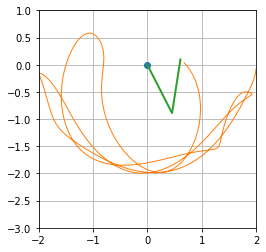

In [31]:
s1 = save_animation(p1.Z[:,0],p1.Z[:,1])
s1.init_q_his()
s1.save()